# Celdas de pruebas

In [13]:
import datacube
dc = datacube.Datacube(app = "first")

In [65]:

xarr = dc.load(
    # Satellite 
    product="s2a_sen2cor_granule", output_crs='EPSG:4326', resolution=(-0.001,0.001)
    # Area to be requested 
    # The query return the images that were obtained 
    # in the time range specified
    # Time format (YYYY-MM-DD)
)

In [68]:
print(max( sentinel_dataset.time))

<xarray.DataArray 'time' ()>
array('2020-01-04T15:29:11.091282000', dtype='datetime64[ns]')
Coordinates:
    time         datetime64[ns] 2020-01-04T15:29:11.091282
    spatial_ref  int32 4326
Attributes:
    units:    seconds since 1970-01-01 00:00:00


In [41]:
df=dc.find_datasets(product="s2a_sen2cor_granule")
df

[Dataset <id=74a9f0b7-c8e2-46e3-893a-ca969ce012b2 product=s2a_sen2cor_granule location=file:///C:/Users/saraPC/Documents/Univerisdad/MONITORI/opendatacube/output/S2A_MSIL2A_20200322T153621_N0214_R068_T18NUL_20200322T193833.yaml>,
 Dataset <id=9664b744-2756-4a3c-ad46-7777e99725ce product=s2a_sen2cor_granule location=file:///C:/Users/saraPC/Documents/Univerisdad/MONITORI/opendatacube/output/S2A_MSIL2A_20200322T153621_N0214_R068_T18NUL_20200322T193833.yaml>]

# Proceso de análisis de imagenes

In [11]:

import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

# Load Data Cube Configuration
import datacube
import utils.data_cube_utilities.data_access_api as dc_api  
api = dc_api.DataAccessApi()
dc= api.dc

In [12]:
product = "s2b_sen2cor_granule"
platform = "SENTINEL_2B"

In [67]:

from utils.data_cube_utilities.dc_load import get_product_extents
from utils.data_cube_utilities.dc_time import dt_to_str

full_lat, full_lon, min_max_dates = get_product_extents(api, platform, product,output_crs='EPSG:4326', resolution=(-0.00001,0.00001))

# Print the extents of the combined data.
print("Latitude Extents:", full_lat)
print("Longitude Extents:", full_lon)
print("Time Extents:", list(map(dt_to_str, min_max_dates)))

TypeError: 'Polygon' object is not iterable

In [14]:
from utils.data_cube_utilities.dc_display_map import display_map
display_map(full_lat, full_lon)

In [13]:
# Phu Thuy, Vietnam
latitude = (4.46, 4.84)
longitude = (-75, -75.8)


# Time Period
time_extents = ('2020-04-1', '2020-04-1')

In [14]:
from utils.data_cube_utilities.dc_display_map import display_map
display_map(latitude,longitude)


In [15]:
sentinel_dataset = dc.load(latitude = latitude,
                          longitude = longitude,
                          platform = platform,
                          product = product,
                          measurements = ['B04_10m', 'B03_10m', 'B02_10m', 'B08_10m', 'B11_20m', 'B12_20m'], output_crs='EPSG:4326', resolution=(-0.00010,0.00010))

In [16]:
sentinel_dataset

<xarray.Dataset>
Dimensions:      (latitude: 3800, longitude: 8000, time: 1)
Coordinates:
  * time         (time) datetime64[ns] 2020-01-04T15:29:11.091282
  * latitude     (latitude) float64 4.84 4.84 4.84 4.84 ... 4.46 4.46 4.46 4.46
  * longitude    (longitude) float64 -75.8 -75.8 -75.8 ... -75.0 -75.0 -75.0
    spatial_ref  int32 4326
Data variables:
    B04_10m      (time, latitude, longitude) uint16 329 352 377 ... 307 327 334
    B03_10m      (time, latitude, longitude) uint16 629 704 691 ... 564 579 579
    B02_10m      (time, latitude, longitude) uint16 361 373 374 ... 318 365 357
    B08_10m      (time, latitude, longitude) uint16 3471 3754 3951 ... 2686 2608
    B11_20m      (time, latitude, longitude) uint16 1621 1879 1912 ... 1514 1514
    B12_20m      (time, latitude, longitude) uint16 816 899 948 ... 811 807 807
Attributes:
    crs:           EPSG:4326
    grid_mapping:  spatial_ref

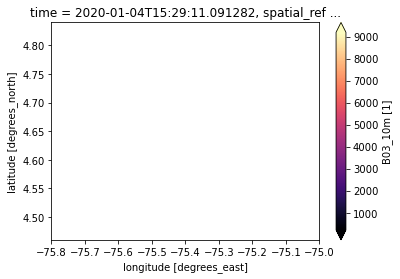

In [17]:
first_timestep = sentinel_dataset.B03_10m.isel(time=0)
first_timestep.plot(robust=True,cmap="magma")

In [20]:
from utils.dea_plotting import rgb

# True Color Image

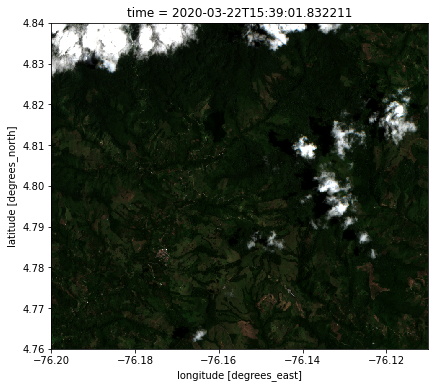

In [21]:
rgb(sentinel_dataset, bands=["B04_10m", "B03_10m", "B02_10m"], index=0)

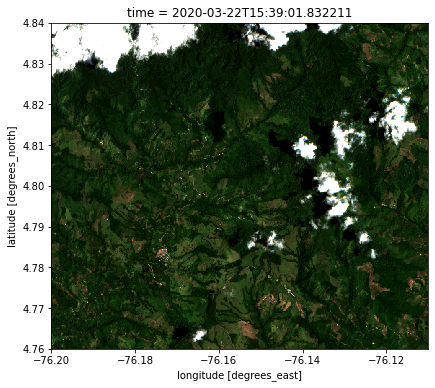

In [22]:
rgb(sentinel_dataset, bands=["B04_10m", "B03_10m", "B02_10m"], percentile_stretch=[0.05, 0.95])

# False color (emphasises growing vegetation in green, and water in deep blue)

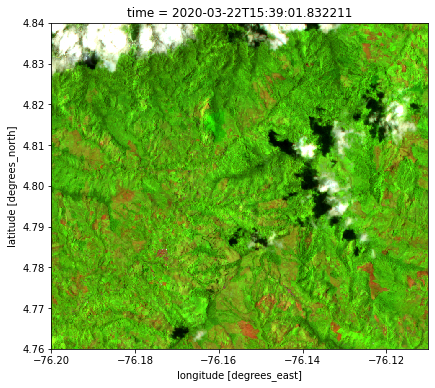

In [23]:
rgb(sentinel_dataset, bands=["B11_20m", "B08_10m", "B03_10m"], index=0)

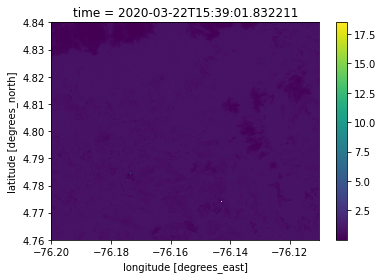

In [25]:
# Calculate the components that make up the NDVI calculation
band_diff = sentinel_dataset.B08_10m- sentinel_dataset.B04_10m
band_sum = sentinel_dataset.B08_10m + sentinel_dataset.B04_10m

# Calculate NDVI and store it as a measurement in the original dataset
ndvi = band_diff / band_sum
ndvi.plot()

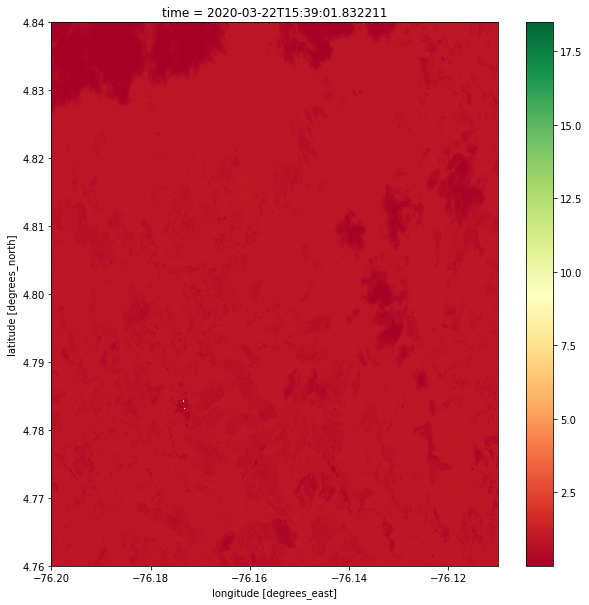

In [26]:
# Set the NDVI time step to view
ndvi_time_step = 0

# This is the simple way to plot
# Note that high values are likely to be vegetation.
plt.figure(figsize=(10, 10))
ndvi.isel(time=ndvi_time_step).plot(cmap="RdYlGn")
plt.show()

In [27]:
from utils.data_cube_utilities.clean_mask import sentinel2_fmask_clean_mask

cloud_mask = sentinel2_fmask_clean_mask(sentinel_dataset)
land_mask = sentinel2_fmask_clean_mask(sentinel_dataset, cover_types=['valid'])

# Land and Water Dataset = Land and Water pixels with NO Clouds and NO Cloud Shadows
land_and_water_dataset = landsat_dataset.where(cloud_mask)

# Land Dataset = Land ONLY pixels with NO Clouds, NO Cloud Shadows and NO Water pixels
land_dataset = landsat_dataset.where(land_mask)

AttributeError: 'Dataset' object has no attribute 'fmask'